Exercise 1

In [2]:

from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [6]:
#PART ONE
gen_quant = CmdStanModel(stan_file='code_1.stan')
F=len("Mikolaj")+len("Szopa")


INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



           Mean  MCSE  StdDev   5%  50%    95%   N_Eff  N_Eff/s  R_hat
name                                                                  
lp__          0   NaN       0  0.0    0    0.0     NaN      NaN    NaN
lambda       99   2.5      77  7.7   84  250.0   980.0  44000.0    1.0
y_sim[1]    100   2.5      77  7.0   82  257.0   972.0  44195.0    1.0
y_sim[2]     99   2.4      77  7.0   83  252.0   980.0  44532.0    1.0
y_sim[3]     99   2.5      77  7.0   83  248.0   975.0  44331.0    1.0
y_sim[4]     99   2.4      77  7.0   82  247.0  1016.0  46161.0    1.0
y_sim[5]     99   2.5      77  6.0   84  252.0   971.0  44156.0    1.0
y_sim[6]    100   2.5      78  7.0   83  255.0   963.0  43780.0    1.0
y_sim[7]    100   2.5      78  6.0   82  251.0   996.0  45288.0    1.0
y_sim[8]    100   2.5      77  7.0   85  250.0   978.0  44439.0    1.0
y_sim[9]     99   2.5      78  7.0   80  252.0   967.0  43977.0    1.0
y_sim[10]    99   2.5      78  7.0   84  251.0   968.0  44002.0    1.0
y_sim

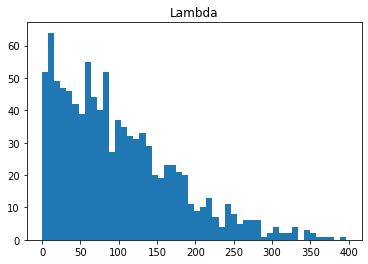

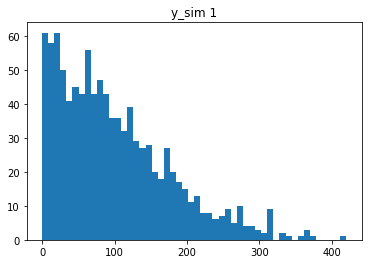

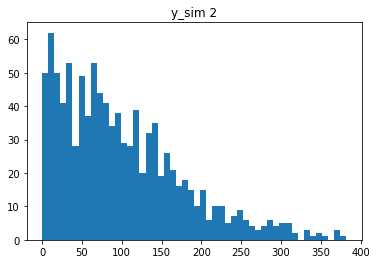

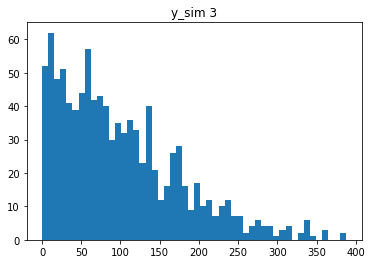

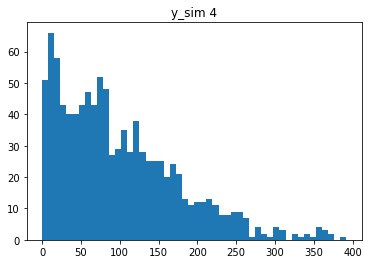

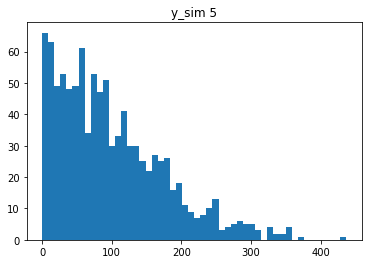

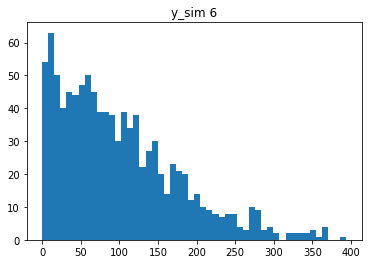

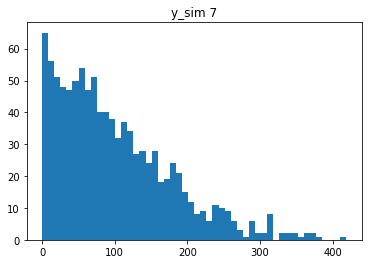

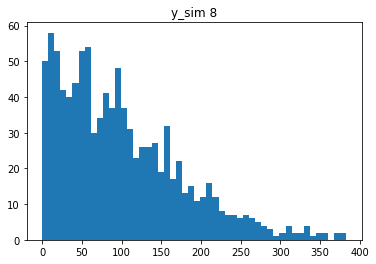

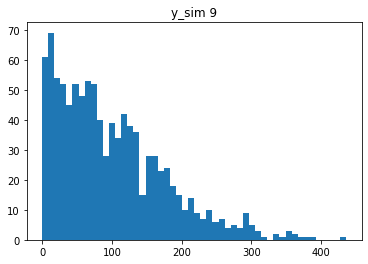

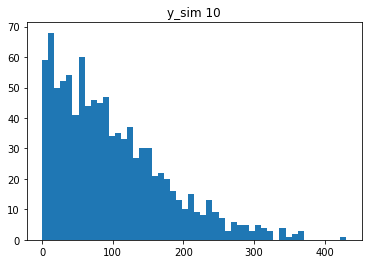

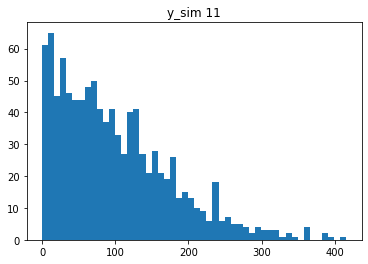

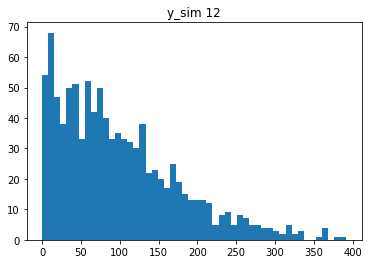

In [8]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

fit_lambda = samples.stan_variable('lambda')
fit_l1 = samples.stan_variable('y_sim')
fit = samples.summary()  


plt.hist(fit_lambda, bins=50)
plt.title(f'Lambda')

print(fit)

for i in range (0,F):
    plt.figure()
    plt.title(f'y_sim {i+1}')
    plt.hist(fit_l1[:,i], bins=50)
    

plt.show()


Eexercise 2

In [11]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

##samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]}) throws errors

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [12]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
#samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]}) throws errors

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


EXERCISE 3 - Constraints on parameters

In [13]:
#Unconstrained parameters

model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma1.diagnose())


INFO:cmdstanpy:compiling stan file D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\code_4.stan to exe file D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\code_4.exe
INFO:cmdstanpy:compiled model executable: D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\code_4.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |██████▉   | 00:00 Iteration: 4700 / 7000 [ 67%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_4-20220314224902_1.csv, D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_4-20220314224902_2.csv, D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_4-20220314224902_3.csv, D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_4-20220314224902_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
8638 of 24000 (35.99%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



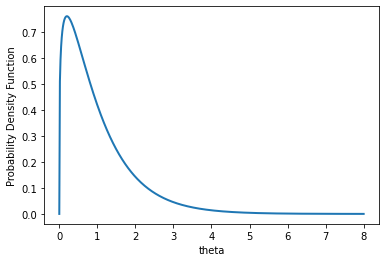

In [14]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In [15]:
#Constrained parameters

model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma2.diagnose())

INFO:cmdstanpy:compiling stan file D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\code_5.stan to exe file D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\code_5.exe
INFO:cmdstanpy:compiled model executable: D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\code_5.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███████   | 00:00 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_5-20220314225056_1.csv, D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_5-20220314225056_2.csv, D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_5-20220314225056_3.csv, D:\MATERIALY\VIII DATA ANALITYCS\Lab 2\samples\code_5-20220314225056_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
1 of 24000 (0.00%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



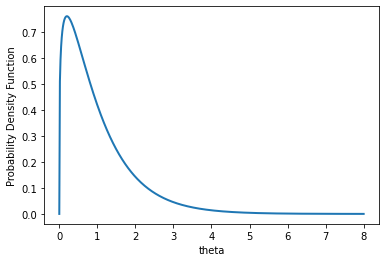

In [16]:

N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Exercise 4

In [24]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = len("Mikolaj") # number of letters in the first name
L = len("Szopa") # number of letters in the last name
y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935



Excercise 5 - different methods of defining models

In [30]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
F=len("Mikolaj")+len("Szopa")
data = {'N': F}
seed = 22071999 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


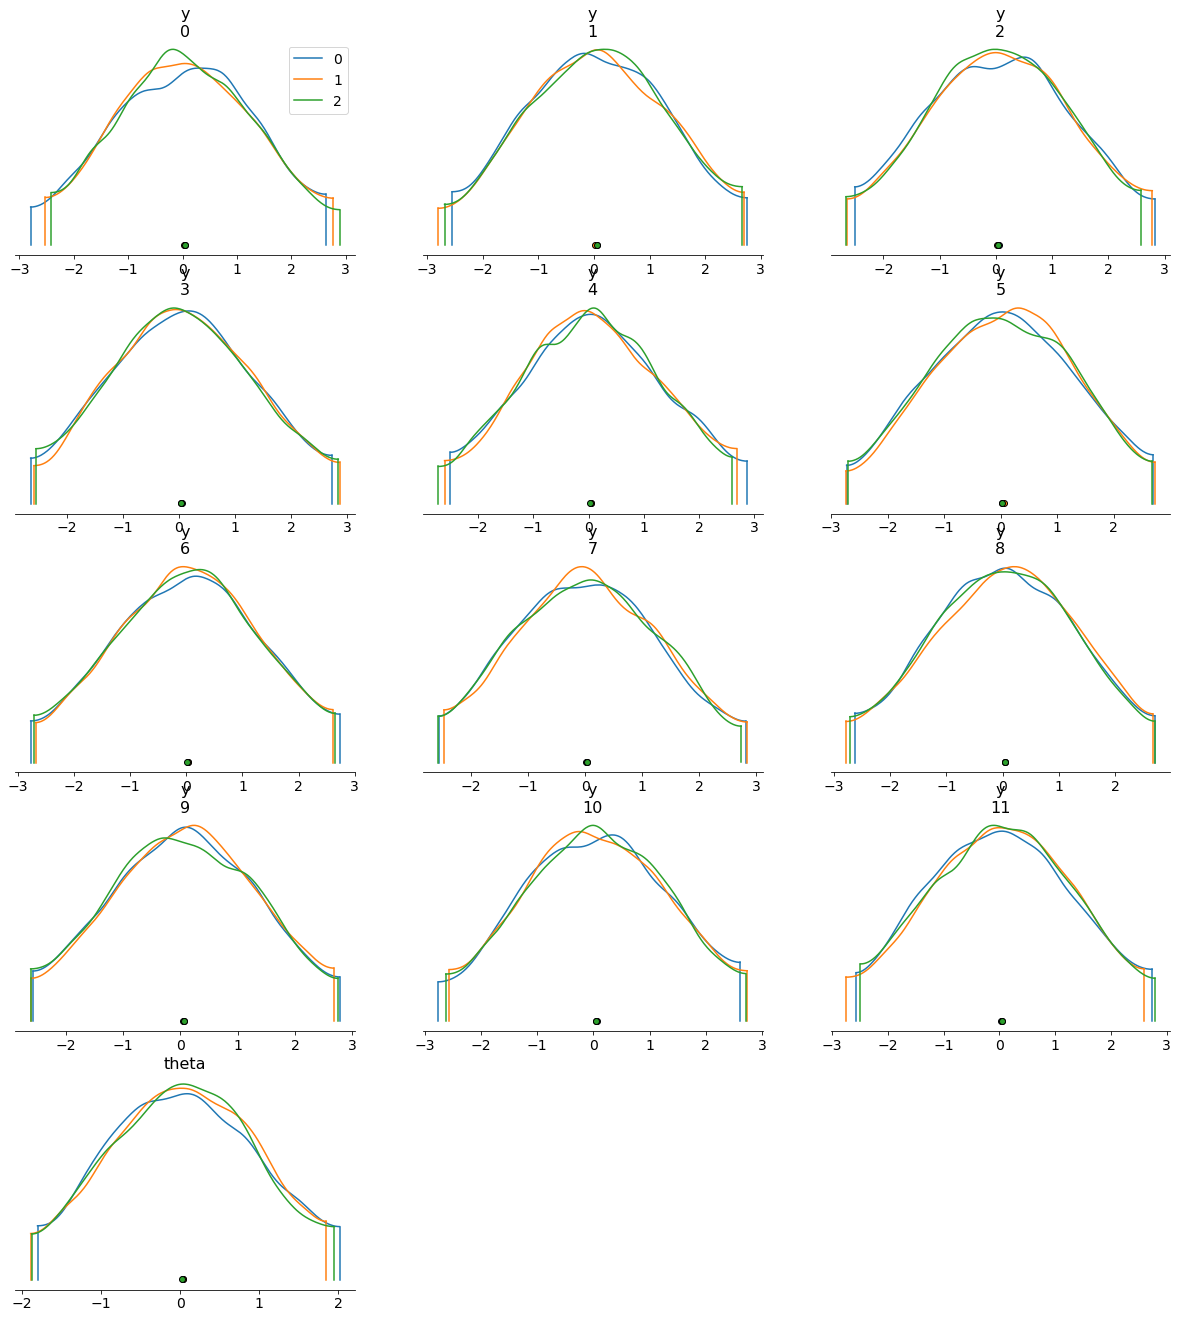

In [31]:
az.plot_density([result_1,result_2,result_3])
plt.show()

Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing


<AxesSubplot:ylabel='Frequency'>

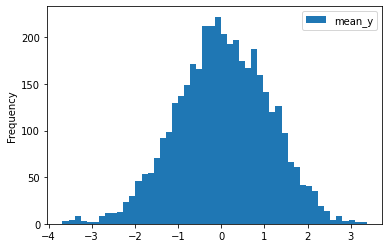

In [38]:

model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample = result_2)
# investigate the output and plot histogram of mean_y variableŌ
mean_of_y_df=mean_of_y.draws_pd()
mean_of_y_df.plot.hist(bins=50)